In [2]:
import  numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  GridSearchCV
from data_preprocessing_final2 import *

In [ ]:
#set columns
pd.set_option("display.max_columns",None)

#set rows
pd.set_option("display.max_rows",None)

### read our file and clean, re-classify, train/test split, and scale our data 

In [4]:
# read our original data file
data = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)

In [5]:
# taking only Normal Sale conditions to make apples to apples comparison for Sales Price (majority were Normal)
data = data[data['SaleCondition'] == 'Normal']

In [6]:
# this function will clean, dummify/ord, test/train split, and scale all our data
train_data_linear, train_target_linear, test_data_linear, test_target_linear, train_data_tree, train_target_tree, test_data_tree, test_target_tree = initiate_data(data)

### Checking our new train/test target and feature variables
- take out the PID so we can run our SVR model

In [7]:
train_data_linear.head()

,PID,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotalBath,Bsmt_Unfin_Ratio,TotalLivArea
0,528235180,0,0,0,0,1,0,0,0,0,...,0.964912,0.294985,0.148876,0.000000,0.000000,0.0,0.0,0.333333,0.234813,0.242435
1,902109160,0,0,0,0,0,1,1,0,0,...,0.219298,0.165929,0.000000,0.000000,0.233202,0.0,0.0,0.000000,0.615385,0.354883
2,911104060,1,0,0,0,0,0,1,0,0,...,0.394737,0.147493,0.000000,0.000000,0.071146,0.0,0.0,0.000000,1.000000,0.091472
3,916460020,0,0,0,0,1,0,0,0,0,...,0.885965,0.421091,0.000000,0.063985,0.000000,0.0,0.0,0.166667,1.000000,0.407497
4,527404180,0,0,0,0,1,0,1,0,0,...,0.877193,0.424779,0.044242,0.000000,0.000000,0.0,0.0,0.083333,0.259259,0.193604


In [8]:
train_data_linear.shape

(1926, 236)

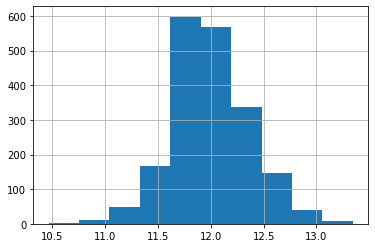

In [9]:
train_target_linear.hist()

In [10]:
# need to delete PID to run the Regression models
del train_data_linear['PID']
del test_data_linear['PID']

# model was built out using these variables so going to redefine our 
# train_data_linear, train_target_linear, test_data_linear, test_target_linear
x_train = train_data_linear
Y_train = train_target_linear

x_test = test_data_linear
Y_test = test_target_linear

# Attempt on SVR
- first attempt just setting gamma0.01 and epsilon=0.001

In [13]:
# creating SVR object
svr = SVR()
svr.set_params(kernel='linear', gamma=0.01, epsilon=0.001) # remember that Radial Basis Function used for non-linear problems (non-linear kernel)

SVR(kernel='linear')

In [40]:
svr.fit(train_data_linear, train_target_linear)
print("Train score:", svr.score(train_data_linear, train_target_linear))
print("Test score:", svr.score(test_data_linear, test_target_linear))

Train score: 0.9504075984133956
Test score: 0.9292788885561097


### GridSearch with SVR
- with linear kernel
- going to try to test using gamma and epsilon and C with GridSearch
- Gamma = DO NOT NEED if you are using RBF, LINEAR, or POLYNOMIAL Kernel if you are using C? (read this)
- (Gamma is basically the curvature of the line that is making the split in your kernel) - Low Gamma, high Spread
- Epsilon = is the size of the tube
- C = controls error, the higher the C the more it will let certain points be misclassified

In [28]:
# setting our parameters up for Grid
paramDict = {'kernel': ['linear'],
#              'C': np.linspace(0.1, 1, 10), 
             'gamma': np.linspace(1e-4, 1, 10), 
             'epsilon': np.linspace(0.001, 0.1, 2)}

In [29]:
grid = GridSearchCV(svr, paramDict, cv=3, return_train_score = True)
grid.fit(train_data_linear, train_target_linear)

GridSearchCV(cv=3, estimator=SVR(kernel='linear'),
             param_grid={'epsilon': array([0.001, 0.1  ]),
                         'gamma': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00]),
                         'kernel': ['linear']},
             return_train_score=True)

In [30]:
#shows the best parameters from the GridSearch
grid.best_params_

{'epsilon': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}

In [31]:
# our best score
grid.best_score_

0.9268637499037458

### GridSearch with SVR (Part 2)
- using kernel = poly

In [32]:
# setting our parameters up for Grid
paramDict = {'kernel': ['poly'],
#              'C': np.linspace(0.1, 1, 10), 
             'gamma': np.linspace(1e-4, 1, 10), 
             'epsilon': np.linspace(0.001, 0.1, 2)}

In [33]:
grid1 = GridSearchCV(svr, paramDict, cv=3, return_train_score=True)
grid1.fit(train_data_linear, train_target_linear)

GridSearchCV(cv=3, estimator=SVR(kernel='linear'),
             param_grid={'epsilon': array([0.001, 0.1  ]),
                         'gamma': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00]),
                         'kernel': ['poly']},
             return_train_score=True)

In [34]:
#shows the best parameters from the GridSearch
grid1.best_params_

{'epsilon': 0.001, 'gamma': 0.11120000000000001, 'kernel': 'poly'}

In [35]:
# our best score
grid1.best_score_

0.8866384387398499

### GridSearch with SVR (Part 3)
- using kernel = rbf

In [36]:
# setting our parameters up for Grid
paramDict = {'kernel': ['rbf'],
#              'C': np.linspace(0.1, 1, 10), 
             'gamma': np.linspace(1e-4, 1, 10), 
             'epsilon': np.linspace(0.001, 0.1, 2)}

In [37]:
grid2 = GridSearchCV(svr, paramDict, cv=3, return_train_score=True)
grid2.fit(train_data_linear, train_target_linear)

GridSearchCV(cv=3, estimator=SVR(kernel='linear'),
             param_grid={'epsilon': array([0.001, 0.1  ]),
                         'gamma': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00]),
                         'kernel': ['rbf']},
             return_train_score=True)

In [38]:
#shows the best parameters from the GridSearch
grid2.best_params_

{'epsilon': 0.001, 'gamma': 0.11120000000000001, 'kernel': 'rbf'}

In [39]:
# our best score
grid2.best_score_

0.8242576728663439

### Taking the Best Kernel and Parameters

In [43]:
# creating SVR object
svr_final = SVR()
svr_final.set_params(kernel='linear', gamma=0.0001, epsilon=0.001)

SVR(epsilon=0.001, gamma=0.0001, kernel='linear')

In [44]:
svr_final.fit(train_data_linear, train_target_linear)
print("Train score:", svr_final.score(train_data_linear, train_target_linear))
print("Test score:", svr_final.score(test_data_linear, test_target_linear))

Train score: 0.9506118045728822
Test score: 0.9373203201275402
